<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/pandas_routine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos nuestro entorno

## Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/'
!ls

/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db
covid_19_data.csv		     Meteorite_Landings.csv
GlobalLandTemperaturesByCountry.csv  notas.csv
london_merged.csv		     population-worldbank


In [5]:
path_file = lambda name_file: '/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/{}'.format(name_file)

## Librerías

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.1.5'

## Modo de impresión decimales pandas y numpy

In [7]:
pd.options.display.float_format = '{:,.3f}'.format

In [8]:
np.set_printoptions(precision = 3)

# Empezamos a trabajar

## DataSet: Climate Change: Earth Surface Temperature Data

In [11]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
path_read_file = path_file('GlobalLandTemperaturesByCountry.csv')
path_read_file

'/content/drive/My Drive/Data Science/Platzi/10. Curso de Manipulación y Análisis de datos con Pandas y Python/db/GlobalLandTemperaturesByCountry.csv'

In [12]:
df = pd.read_csv(path_read_file)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,nan,nan,Åland
2,1744-01-01,nan,nan,Åland
3,1744-02-01,nan,nan,Åland
4,1744-03-01,nan,nan,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [13]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [16]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [17]:
df.shape

(577462, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [22]:
# convertirmos nuestra variable dt a tiempo
df['year'] = pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [32]:
# ahora quitamos todas las fechas que sean menores a 1970
df_temp = df[df['year'].dt.year >= 1970]
df_temp

# Otra forma
#idx = df['year'] >= pd.to_datetime('1970-01-01')
#df_temp = df_temp[idx]
#df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2714,1970-01-01,-6.495,0.584,Åland,1970-01-01
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [36]:
# Necesitamos agrupar por fecha y por país y encontrar un promedio anual 
# para temperatura
df.groupby(['Country', 
            pd.Grouper(key = 'year', freq='1Y')
            ]).agg({'AverageTemperature': [np.mean, np.median]})
# traemos el promedio y la mediana

AverageTemperature       
                                     mean median
Country     year                                
Afghanistan 1838-12-31             18.380 18.981
            1839-12-31                nan    nan
            1840-12-31             13.413 13.965
            1841-12-31             13.998 15.785
            1842-12-31             15.155 14.983
...                                   ...    ...
Åland       2009-12-31              6.489  5.577
            2010-12-31              4.862  4.755
            2011-12-31              7.171  7.499
            2012-12-31              6.064  6.254
            2013-12-31              6.230  6.014

[48243 rows x 2 columns]

In [69]:
# guardamos en un df
df_t_avg = df_temp.groupby(['Country', 
            pd.Grouper(key = 'year', freq='1Y')
            ]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avg        

AverageTemperature       
                                     mean median
Country     year                                
Afghanistan 1970-12-31             14.783 15.471
            1971-12-31             14.824 14.934
            1972-12-31             12.547 13.872
            1973-12-31             14.236 14.913
            1974-12-31             13.317 13.616
...                                   ...    ...
Åland       2009-12-31              6.489  5.577
            2010-12-31              4.862  4.755
            2011-12-31              7.171  7.499
            2012-12-31              6.064  6.254
            2013-12-31              6.230  6.014

[10692 rows x 2 columns]

In [70]:
df_t_avg.xs('Peru')['AverageTemperature']

,mean,median
year,,
1970-12-31,20.141,20.388
1971-12-31,19.803,19.892
1972-12-31,20.532,20.461
1973-12-31,20.149,20.038
1974-12-31,19.729,19.844
1975-12-31,19.780,19.953
1976-12-31,19.878,19.867
1977-12-31,20.181,20.279
1978-12-31,20.083,20.209


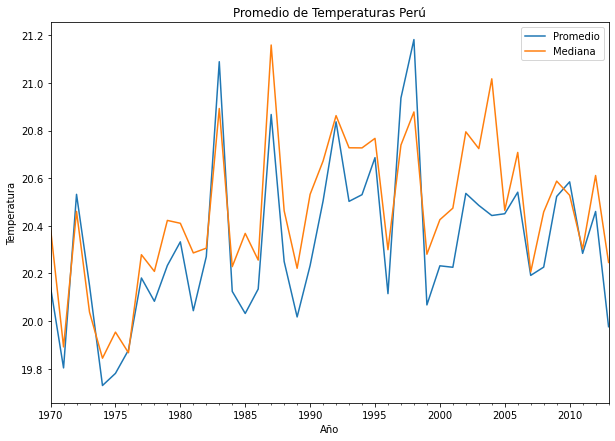

In [71]:
# vamos a Perú
ax = df_t_avg.xs('Peru')['AverageTemperature'].plot(figsize = (10, 7),
                                               title = 'Promedio de Temperaturas Perú',
                                               xlabel = 'Año',
                                               ylabel = 'Temperatura',
                                               legend = False)
ax.legend(['Promedio', 'Mediana'])

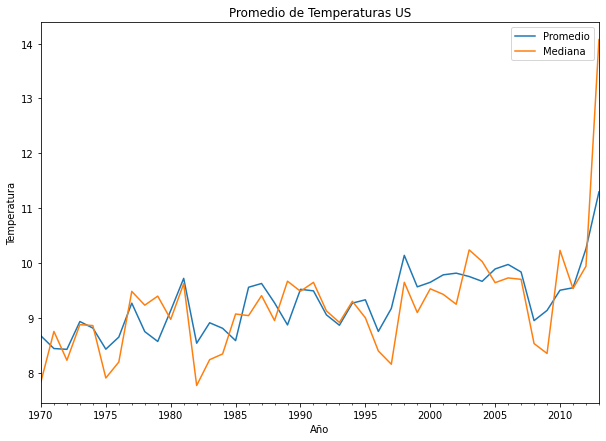

In [72]:
# vamos a United States
ax = df_t_avg.xs('United States')['AverageTemperature'].plot(figsize = (10, 7),
                                               title = 'Promedio de Temperaturas US',
                                               xlabel = 'Año',
                                               ylabel = 'Temperatura',
                                               legend = False)
ax.legend(['Promedio', 'Mediana'])

In [73]:
# es mejor trabajar con la mediana ya que es un estimador estadístico
# que no sufre sesgos ante valores atípicos
df_tem_median = df_t_avg['AverageTemperature'][['median']].reset_index()
df_tem_median

,Country,year,median
0,Afghanistan,1970-12-31,15.471
1,Afghanistan,1971-12-31,14.934
2,Afghanistan,1972-12-31,13.872
3,Afghanistan,1973-12-31,14.913
4,Afghanistan,1974-12-31,13.616
...,...,...,...
10687,Åland,2009-12-31,5.577
10688,Åland,2010-12-31,4.755
10689,Åland,2011-12-31,7.499
10690,Åland,2012-12-31,6.254


In [74]:
# creamos una columna solo con los años
df_tem_median['date'] = df_tem_median['year'].dt.year
df_tem_median

,Country,year,median,date
0,Afghanistan,1970-12-31,15.471,1970
1,Afghanistan,1971-12-31,14.934,1971
2,Afghanistan,1972-12-31,13.872,1972
3,Afghanistan,1973-12-31,14.913,1973
4,Afghanistan,1974-12-31,13.616,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.577,2009
10688,Åland,2010-12-31,4.755,2010
10689,Åland,2011-12-31,7.499,2011
10690,Åland,2012-12-31,6.254,2012


In [75]:
# vamos a renombrar algunas de las columnas
df_tem_median.rename(columns = {'median': 'temperature'}, inplace = True)
df_tem_median

,Country,year,temperature,date
0,Afghanistan,1970-12-31,15.471,1970
1,Afghanistan,1971-12-31,14.934,1971
2,Afghanistan,1972-12-31,13.872,1972
3,Afghanistan,1973-12-31,14.913,1973
4,Afghanistan,1974-12-31,13.616,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.577,2009
10688,Åland,2010-12-31,4.755,2010
10689,Åland,2011-12-31,7.499,2011
10690,Åland,2012-12-31,6.254,2012


In [76]:
# exploramos la composición de las temperaturas por país
df_t_pivot = pd.pivot_table(index = 'date', columns = 'Country' ,values = 'temperature', data = df_tem_median)
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,15.471,25.037,12.125,22.593,26.854,10.515,23.041,27.011,26.907,15.950,10.186,28.275,8.256,22.575,5.341,12.081,25.446,27.065,25.570,27.190,26.910,5.978,9.198,26.081,27.128,13.122,22.175,27.776,9.858,24.484,25.523,26.557,10.808,27.822,25.181,19.944,27.041,24.298,-4.352,24.428,...,22.681,1.298,12.805,12.805,27.541,28.050,26.462,-9.758,19.381,1.167,5.890,19.206,22.726,6.010,22.480,26.818,26.925,27.132,23.638,26.424,19.047,12.466,16.044,26.749,22.972,8.564,28.818,8.413,8.510,7.837,16.931,13.864,25.169,24.158,26.557,23.250,26.861,22.304,23.393,4.317
1971,14.934,24.776,11.674,22.781,26.485,11.927,22.462,26.529,26.381,14.767,8.639,28.085,8.184,22.298,7.139,10.706,25.496,25.514,25.328,26.318,26.479,5.776,10.006,25.263,26.930,12.642,21.245,27.290,10.189,23.955,24.912,26.247,9.582,27.931,24.734,19.626,27.015,24.073,-3.475,23.653,...,21.911,1.542,11.957,12.646,27.154,27.915,25.892,-10.528,19.529,1.672,8.521,17.122,22.180,5.839,22.392,26.630,26.413,26.380,23.842,26.009,19.647,10.639,14.968,26.776,22.736,7.433,27.818,8.778,8.978,8.755,16.547,12.986,24.648,24.111,26.247,20.271,26.513,21.826,22.706,4.487
1972,13.872,25.123,11.218,22.498,26.820,10.025,22.607,26.915,26.770,14.345,11.495,28.678,8.644,22.347,5.376,13.688,25.815,26.354,26.029,26.904,27.023,6.093,8.784,25.814,26.703,12.580,21.953,27.805,9.726,23.023,25.143,26.615,10.649,28.230,25.483,20.043,27.216,24.185,-6.678,23.667,...,22.311,0.446,12.559,12.210,27.482,28.977,26.159,-5.966,19.967,2.287,6.161,19.430,23.064,4.911,22.691,26.921,26.254,27.044,23.224,26.469,18.639,13.244,16.341,27.111,23.285,9.030,28.049,8.623,8.799,8.229,16.919,13.564,25.261,24.517,26.615,21.390,26.818,21.980,22.398,5.620
1973,14.913,25.345,11.837,22.998,27.012,9.553,23.073,27.336,27.172,14.867,9.734,28.163,8.583,22.977,4.591,11.883,25.584,27.069,25.922,27.155,26.873,5.791,8.096,26.484,27.338,13.543,22.419,27.722,9.310,23.614,25.280,27.069,10.556,28.486,25.418,20.241,27.402,24.666,-3.665,24.536,...,22.480,1.677,12.826,12.391,27.594,28.623,26.435,-9.614,18.893,0.479,5.123,18.926,23.260,5.588,22.782,26.929,27.044,26.931,23.902,26.457,19.639,12.131,15.878,26.812,23.045,8.507,28.729,7.448,7.518,8.878,17.542,13.473,25.202,25.008,27.069,22.922,27.227,22.109,22.582,3.580
1974,13.616,24.826,11.321,21.579,26.635,8.204,22.328,26.602,26.519,15.216,9.326,27.794,8.387,21.611,5.155,11.607,25.245,26.358,25.495,27.276,26.788,6.108,8.331,25.602,26.779,14.020,21.240,27.397,8.358,22.005,24.767,26.172,10.403,27.005,25.535,19.899,27.227,24.020,-6.040,23.354,...,21.889,1.489,12.249,10.863,27.230,28.199,25.892,-7.034,19.319,2.469,5.426,19.135,22.936,5.668,22.341,26.755,26.497,26.447,23.872,26.255,18.532,12.076,14.370,26.352,22.967,8.482,27.857,7.345,7.391,8.861,17.402,13.210,25.076,24.370,26.172,21.575,26.632,21.601,21.326,5.455
1975,13.513,24.805,12.360,23.074,26.651,10.411,22.421,26.478,26.334,15.151,10.216,28.114,8.860,21.420,5.866,12.213,25.925,25.563,25.686,27.331,26.456,6.986,8.473,25.863,26.779,14.146,21.852,27.468,10.376,23.162,25.177,26.298,11.160,26.968,25.

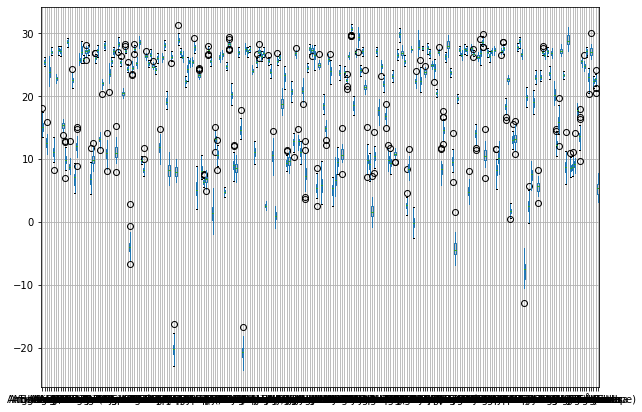

In [78]:
df_t_pivot.boxplot(figsize = (10, 7))

In [81]:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,14.392,25.288,11.588,23.032,27.078,9.968,22.450,27.131,26.906,14.922,11.296,28.449,9.255,23.412,5.687,13.239,26.038,27.047,25.823,27.102,26.776,6.879,9.538,26.213,27.114,13.203,22.413,27.751,9.553,23.647,25.658,26.790,10.416,28.131,25.706,20.468,27.005,24.341,-4.240,24.303,...,22.511,1.538,12.835,11.862,28.115,28.553,26.557,-9.207,20.014,2.905,6.293,19.676,22.282,5.451,23.017,26.955,26.300,26.899,23.349,26.523,18.634,12.479,16.790,27.198,23.066,9.144,28.542,8.222,8.367,9.649,17.538,14.680,25.500,24.612,26.790,22.200,27.047,22.380,23.327,5.466
2005,15.519,26.068,12.448,25.335,27.456,12.062,23.120,28.018,27.880,14.439,10.228,28.730,9.680,24.297,7.802,12.512,25.836,27.458,26.160,27.116,28.096,7.784,11.932,26.830,27.392,12.942,21.310,28.398,10.848,24.459,25.789,27.744,10.767,28.928,25.545,21.325,27.444,24.794,-1.998,25.389,...,22.793,2.115,13.726,14.343,28.079,28.877,27.285,-6.896,20.643,4.016,8.419,18.779,23.628,5.977,24.078,27.121,27.049,27.434,23.960,27.305,21.169,11.889,16.692,27.515,23.723,9.465,29.599,9.157,9.315,9.643,16.667,14.422,25.877,24.982,27.744,24.005,27.413,22.942,22.918,6.479


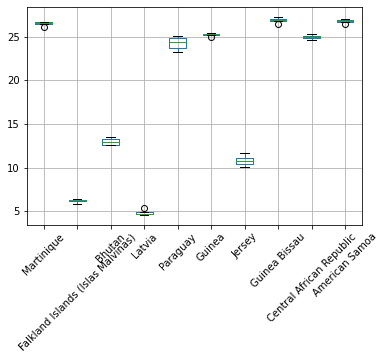

In [96]:
# sacamos 10 países y luego los 4 primeros años a partir de 1970
# hacemos el gráfico
# para los nombres hacemos una rotación de 45°
df_t_pivot.T.sample(10).T.head(4).boxplot(rot = 45)